<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/Deep_Learning_with_PyTorch_Chapter00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch

code examples from https://github.com/dvgodoy/PyTorchStepByStep

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D

* ### Batch -->  all points in the training set (n = N) to compute the loss, we are performing a batch gradient descent
* ### Stochastic Gradient Descent --> if we were to use a single point (n = 1) each time, it would be a stochastic gradient descent
* ### Mini-batch --> anything else (n) in-between 1 and N characterizes a mini- batch gradient descent

In [3]:
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

In [4]:
def figure0(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    ax.scatter(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim([0, 3.1])
    ax.set_title('Generated Data - x , y ')

    
    return fig, ax

In [5]:
def figure2(x_train, y_train, b, w, color='k'):
    # Generates evenly spaced x feature
    x_range = np.linspace(0, 1, 101)
    # Computes yhat
    yhat_range = b + w * x_range

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim([0, 3])

    # Dataset
    ax.scatter(x_train, y_train)
    # Predictions
    ax.plot(x_range, yhat_range, label='Model\'s predictions', c=color, linestyle='--')

    # Annotations
    ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.2, .55), c=color)
    ax.legend(loc=0)
    fig.tight_layout()
    return fig, ax

In [6]:
true_b = 1
true_w = 2

n= 100

#random data generation
np.random.seed(42)
x = np.random.rand(n,1)

e = (0.1 * np.random.randn(n,1))

# linear equation
y = true_b + true_w * x + e

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d033d88d0>)

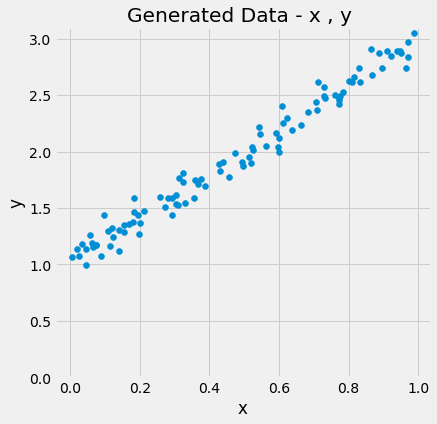

In [7]:
figure0(x, y)

In [8]:
idx = np.arange(n)
np.random.shuffle(idx)

#split 80: 20 train vs test
train_idx = idx[:int(n*0.8)]
val_idx = idx[int(n*0.8):]

print(len(train_idx))
print(len(val_idx))

80
20


In [9]:
# generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val =  x[val_idx], y[val_idx]

(<Figure size 1152x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d031a1150>,
       dtype=object))

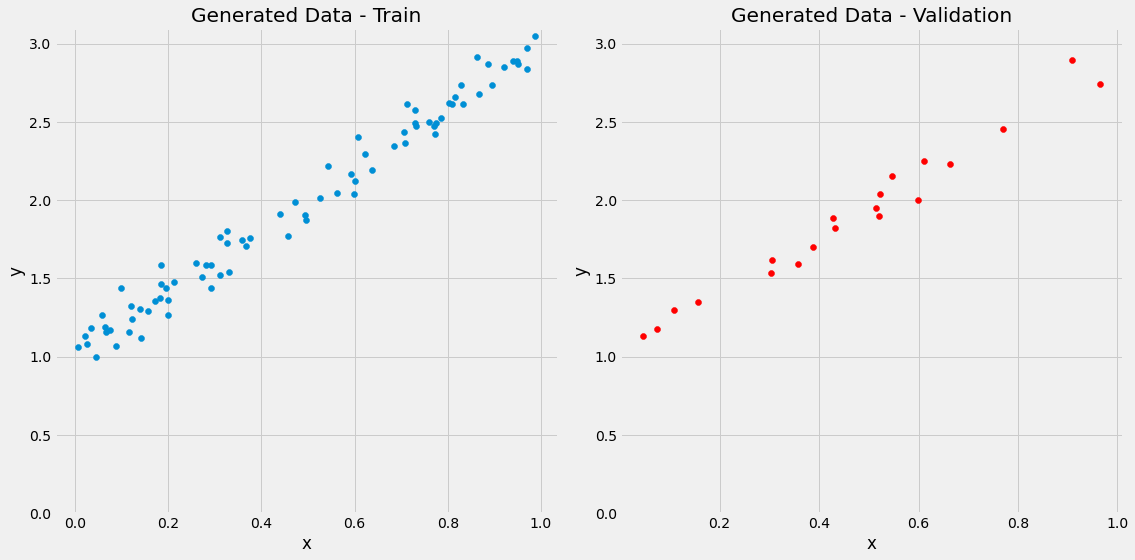

In [10]:
figure1(x_train, y_train, x_val, y_val)

# compute model's prediction 

In [11]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

In [12]:
print(b.shape)
print(w.shape)

(1,)
(1,)


In [13]:
yhat = b + w * x_train
yhat.shape

(80, 1)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d00c4aa90>)

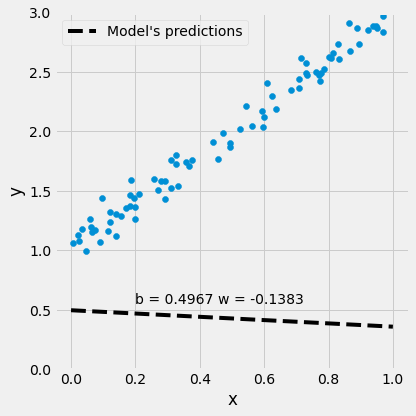

In [14]:
figure2(x_train, y_train, b, w)

In [15]:
error = (yhat - y_train)
error.shape

(80, 1)

In [16]:
loss = (error ** 2).mean()
loss

2.7421577700550976

# loss surface

In [17]:
# create possible values for b & w
b_range = np.linspace(true_b -3, true_b+3, 101)
b_range.shape

(101,)

In [18]:
w_range = np.linspace(true_w -3, true_w+3, 101)
w_range.shape

(101,)

In [19]:
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

# prediction for a single data point in training data

In [20]:
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat.shape

(101, 101)

In [21]:
#repeat the same process for every value in training set x_train

function = lambda x: bs+ws*x
all_predictions = np.apply_along_axis(func1d = function, axis = 1, arr = x_train)

In [22]:
all_predictions.shape

(80, 101, 101)

In [23]:
y_train.shape

(80, 1)

In [24]:
all_lables = y_train.reshape(-1,1,1)
all_lables.shape

(80, 1, 1)

In [25]:
all_errors = (all_predictions - all_lables)
all_errors.shape

(80, 101, 101)

In [26]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


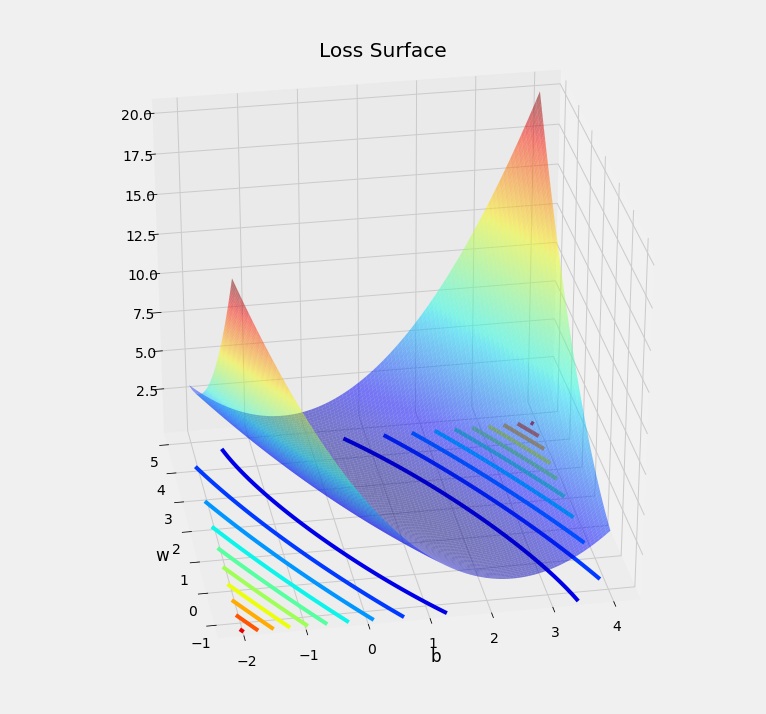

In [27]:
figure = plt.figure(figsize=(12, 12))
ax1 = figure.add_subplot(1,1,1, projection='3d')

ax1.set_xlabel('b')
ax1.set_ylabel('w')
ax1.set_title('Loss Surface')

surf = ax1.plot_surface(bs, ws, all_losses, rstride=1, cstride=1, alpha=.5, cmap=plt.cm.jet, linewidth=0, antialiased=True)
ax1.contour(bs[0, :], ws[:, 0], all_losses, 10, offset=-1, cmap=plt.cm.jet)

ax1.view_init(30, 260)

figure.show()

# cross sections

In [28]:
def fit_model(x_train, y_train):
    # Fits a linear regression to find the actual b and w that minimize the loss
    regression = LinearRegression()
    regression.fit(x_train, y_train)
    b_minimum, w_minimum = regression.intercept_[0], regression.coef_[0][0]
    return b_minimum, w_minimum

In [29]:
def find_index(b, w, bs, ws):
    # Looks for the closer indexes for the updated b and w inside their respective ranges
    b_idx = np.argmin(np.abs(bs[0, :] - b))
    w_idx = np.argmin(np.abs(ws[:, 0] - w))

    # Closest values for b and w
    fixedb, fixedw = bs[0, b_idx], ws[w_idx, 0]
    
    return b_idx, w_idx, fixedb, fixedw

In [30]:
b_minimum, w_minimum = fit_model(x_train, y_train)
b_idx, w_idx, fixedb, fixedw = find_index(b, w, bs, ws)

b_range = bs[0, :]
w_range = ws[:, 0]

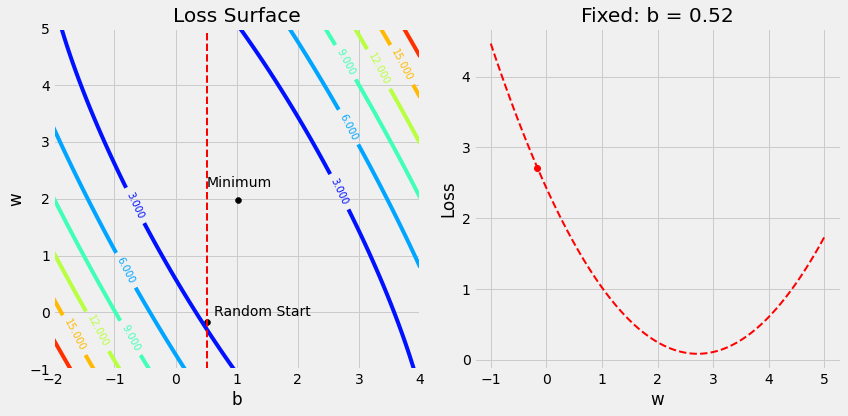

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Loss Surface')
axs[0].set_xlabel('b')
axs[0].set_ylabel('w')

axs[1].set_xlabel('w')
axs[1].set_ylabel('Loss')

# Loss surface
CS = axs[0].contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
axs[0].clabel(CS, inline=1, fontsize=10)

# Minimum
axs[0].scatter(b_minimum, w_minimum, c='k')

# Starting point
axs[0].scatter(fixedb, fixedw, c='k')

# Vertical section
axs[0].plot([fixedb, fixedb], w_range[[0, -1]], linestyle='--', c='r', linewidth=2)

axs[0].annotate('Minimum', xy=(.5, 2.2), c='k')
axs[0].annotate('Random Start', xy=(fixedb + .1, fixedw + .1), c='k')

# Loss
axs[1].plot(w_range, all_losses[:, b_idx], c='r', linestyle='--', linewidth=2)
axs[1].set_title('Fixed: b = {:.2f}'.format(fixedb))

# Starting point
axs[1].plot([fixedw], [all_losses[w_idx, b_idx]], 'or')

fig.tight_layout()

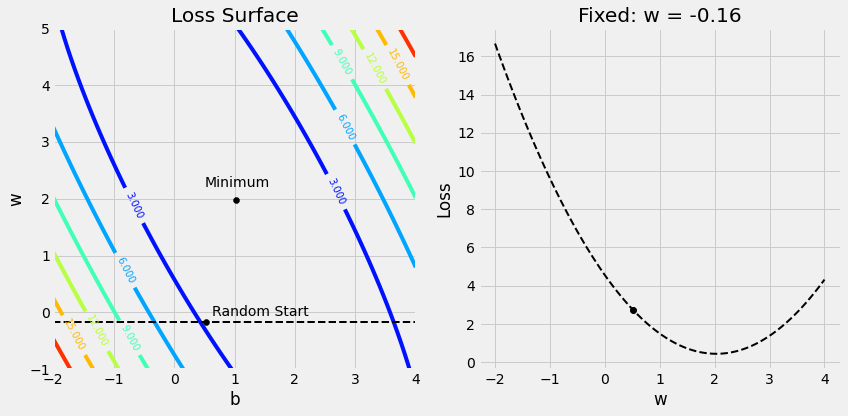

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Loss Surface')
axs[0].set_xlabel('b')
axs[0].set_ylabel('w')

axs[1].set_xlabel('w')
axs[1].set_ylabel('Loss')

# Loss surface
CS = axs[0].contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
axs[0].clabel(CS, inline=1, fontsize=10)

# Minimum
axs[0].scatter(b_minimum, w_minimum, c='k')

# Starting point
axs[0].scatter(fixedb, fixedw, c='k')

# horizontal section
#axs[0].plot([fixedb, fixedb], w_range[[0, -1]], linestyle='--', c='r', linewidth=2)
axs[0].plot(b_range[[0, -1]], [fixedw, fixedw], linestyle='--', c='k', linewidth=2)

axs[0].annotate('Minimum', xy=(.5, 2.2), c='k')
axs[0].annotate('Random Start', xy=(fixedb + .1, fixedw + .1), c='k')

# Loss
axs[1].plot(b_range, all_losses[w_idx, :], c='k', linestyle='--', linewidth=2)
axs[1].set_title('Fixed: w = {:.2f}'.format(fixedw))

# Starting point
axs[1].plot([fixedb], [all_losses[w_idx, b_idx]], 'ok')

fig.tight_layout()

# compute the gradiants

In [33]:
b_grad = 2 * error.mean()
b_grad

-3.044811379650508

In [34]:

w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


# Scaling / Standardizing / Normalizing

In [36]:
scaler = StandardScaler(with_mean=True, with_std=True)

 # We use the TRAIN set ONLY to fit the scaler 
scaler.fit(x_train)

# Now we can use the already fit scaler to TRANSFORM # both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

In [37]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

In [45]:
def figure17(x_train, y_train, scaled_bs, scaled_ws, scaled_x_train):
    # So we recompute the surface for X_TRAIN using the new ranges
    all_predictions = np.apply_along_axis(func1d=lambda x: scaled_bs + scaled_ws * x, axis=1, arr=x_train)
    all_errors = (all_predictions - y_train.reshape(-1, 1, 1))
    all_losses = (all_errors ** 2).mean(axis=0)


    # Then we compute the surface for SCALED_X_TRAIN using the new ranges
    scaled_all_predictions = np.apply_along_axis(func1d=lambda x: scaled_bs + scaled_ws * x, axis=1, arr=scaled_x_train)
    scaled_all_errors = (scaled_all_predictions - y_train.reshape(-1, 1, 1))
    scaled_all_losses = (scaled_all_errors ** 2).mean(axis=0)

    b_minimum, w_minimum = fit_model(x_train, y_train)

    scaled_b_minimum, scaled_w_minimum = fit_model(scaled_x_train, y_train)

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    axs[0].set_xlabel('b')
    axs[0].set_ylabel('w')
    axs[0].set_title('Loss Surface - Original')

    # Loss Surface - ORIGINAL
    CS = axs[0].contour(scaled_bs[0, :], scaled_ws[:, 0], all_losses, cmap=plt.cm.jet)
    axs[0].clabel(CS, inline=1, fontsize=10)
    # Minimum point - ORIGINAL
    axs[0].scatter(b_minimum, w_minimum, c='k')

    # Annotations
    axs[0].annotate('Minimum', xy=(.3, 1.6), c='k')

    axs[1].set_xlabel('b')
    axs[1].set_ylabel('w')
    axs[1].set_title('Loss Surface - Scaled')

    # Loss Surface - SCALED
    CS = axs[1].contour(scaled_bs[0, :], scaled_ws[:, 0], scaled_all_losses, cmap=plt.cm.jet)
    axs[1].clabel(CS, inline=1, fontsize=10)
    # Minimum point - SCALED
    axs[1].scatter(scaled_b_minimum, scaled_w_minimum, c='k')

    # Annotations
    axs[1].annotate('Minimum', xy=(1.3, .15), c='k')

    fig.tight_layout()
    return fig, axs

(<Figure size 1080x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d00649f50>,
       dtype=object))

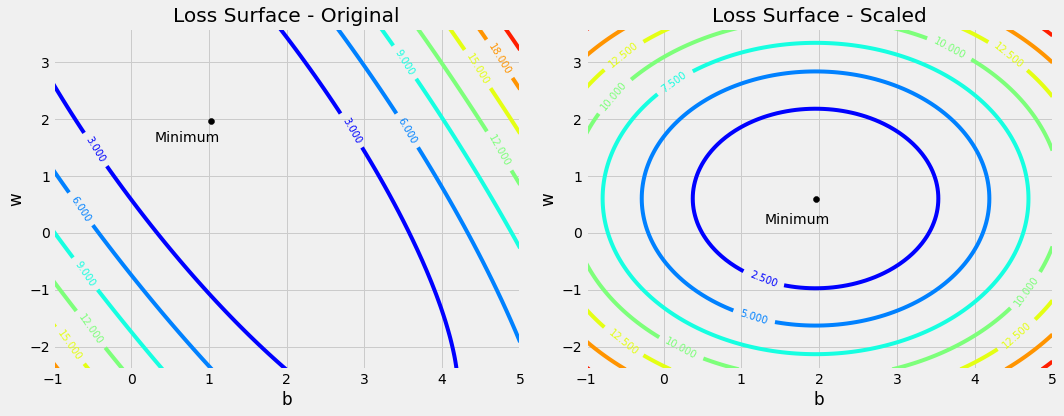

In [46]:
figure17(x_train, y_train, scaled_bs, scaled_ws, scaled_x_train)